In [1]:
import numpy as np
import matplotlib.pyplot as plt


import operator as op
import functools as ft

def summ(a_map):
    "sum(map) does not do what one would expect it to do, but summ(map) does"
    return ft.reduce(op.add, a_map)

def integr(acc, new):
    "reduction function to compute an integral"
    if not acc: 
        acc = [0]
        last = 0
    else:
        last = acc[-1]
        
    acc.append(last+new)
    return acc
  
def pf(Proba):
    "converting uniform draw into binary draw (factory function)"
    def f(x):
        return 0 if x>P else 1
    f.__doc__ = "converts uniform draw into binary draw with proba %.4f" % Proba
    return f

from scipy.misc import comb
def pdf(n,p,k):
    "the binomial density function B(n,p,k)"
    return comb(n, k) * p**k * (1-p)**(n-k)

#Frequentist vs Bayesian statistics - Part I

In the first scenario we consider we are looking at something like coin-flips: we have a series of events, each of them being either _heads_ or _tails_. There are a number of questions we could ask

- we might have a view on the probabilities; for example, we might want to ask whether or not this coin is _fair_, ie whether heads and tails appear with equal probability
 
- we might have no view on probabilities, so we might ask what the respective probabilities of heads and tails are

- we might want to go a step back and ask whether the series is random in the first place, and - if yes - if the variables are independent

The first of those points is what one would generally call **hypothesis testing**: we have one hypothesis (and the emphasis is on _one_) and we want to know whether or not it is true. In the second case we are in the realm of **parameter estimation**. Note that this could also be framed as hypothesis testing: the hypothesis $H_p$ is that the parameter has the value $p$. The difference here is that we are testing an infinite number of hypothesis against a given that of data, in which case there is a chance that one will _stick_ even though it is not true (I have [written about hypothesis shopping before][shopping]). The last case is what one could term a **meta-hypothesis**, in the sense that if that one is false the other questions no longer make sense.

So let's now set up our random sample: We will draw _N_ independent digital variables (1=heads, 0=tails) with a probability of heads of _P_. The number of heads will be called _K_, and the _realised_ probability, ie the ratio of _K_ and _N_, will be called _p_.

In [2]:
N = 20
P = 0.6
l = list(map (pf(P), np.random.uniform(size=N)))
ls = ft.reduce(lambda acc, n: acc + str(n), l, "")
K = sum(l)
l2 = list(map (pf(P), np.random.uniform(size=N*10)))
ls2 = ft.reduce(lambda acc, n: acc + str(n), l, "")
K2 = sum(l2)
print ("N = %i (%i)" % (N,10*N))
print ("P = %.2f" % P)
print ("K = %i (%i)" % (K,K2))
#print ("K = %i ('%s')" % (K,ls))
print ("p = %.2f (%.2f)" % (K/N, K2/(10*N)))

N = 20 (200)
P = 0.60
K = 12 (115)
p = 0.60 (0.57)


Let's look at our first task from above, _hypothesis testing_: we want to know whether the result we have obtained is compatible with our hypothesis that the probability equals _Ph_. For this we look at the problem from the other end: if our hypothesis was true and we ran this experiment, what result would we get? We can draw the graph of the probability density function (it is a binomial distribution, therefore it is a bar chart, not a continous function) and we can look at the corresponding value for the _K_ we found. It turns that the probability value itself is not that meaningful: the more samples we take - the bigger our _N_ - the smaller the chance of obtaining any given _K_. 

One common decision rule is to define an inner region and an outer region, for example symmetric, with 90% probability (approximately; in a binomial distribution we only have a discrete set of choices) in the inner region. We can then say that if our observation falls in the outer region our hypothesis should be rejected. Note that the opposite does not hold actually: we can't accept our hypothesis, we can only "fail to reject it".

In [3]:
Ph = 0.5

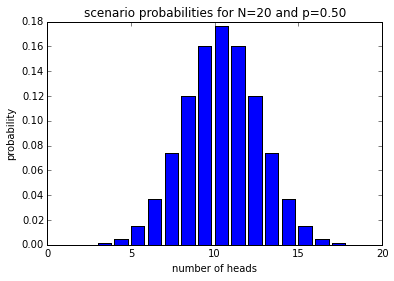

Probability for K=12 is 0.12
Probability to be within K=7...13 for N=20: 0.88


In [4]:
x = range(N)
lo = 7
hi = N-lo
mdf = [pdf(N,Ph,k) for k in x]
plt.bar(x,mdf)
plt.title('scenario probabilities for N=%i and p=%0.2f' % (N,Ph))
plt.xlabel('number of heads')
plt.ylabel('probability')
plt.show()
print("Probability for K=%i is %.2f" % (K,pdf(N,Ph,K)) )
print("Probability to be within K=%i...%i for N=%i: %0.2f" % (lo,hi,N,sum([(pp if (i>=lo and i<=hi) else 0) for i,pp in enumerate(mdf)])))

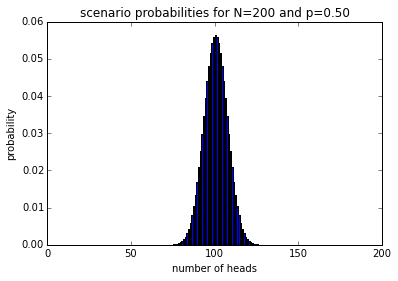

Probability for K=115 is 0.0060
Probability to be within 90...110 for N=200: 0.86


In [5]:
x = range(N*10)
lo2 = 90
hi2 = N*10-lo2
mdf = [pdf(N*10,Ph,k) for k in x]
plt.bar(x,mdf)
plt.title('scenario probabilities for N=%i and p=%0.2f' % (N*10,Ph))
plt.xlabel('number of heads')
plt.ylabel('probability')
plt.show()
print("Probability for K=%i is %.4f" % (K2,pdf(N*10,Ph,K2)) )
print("Probability to be within %i...%i for N=%i: %0.2f" % (lo2,hi2,N*10,sum([(pp if (i>=lo2 and i<=hi2) else 0) for i,pp in enumerate(mdf)])))

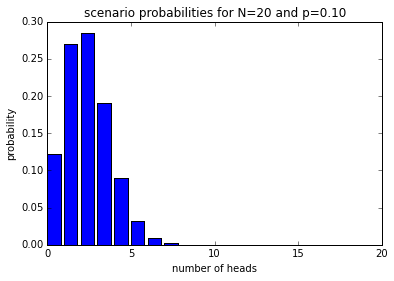

Probability for K=12 is 0.00
Probability to be within 0...3: 0.87


In [6]:
x = range(N)
lo3 = 0
hi3 = 3
mdf = [pdf(N,0.1,k) for k in x]
plt.bar(x,mdf)
plt.title('scenario probabilities for N=%i and p=%0.2f' % (N,0.1))
plt.xlabel('number of heads')
plt.ylabel('probability')
plt.show()
print("Probability for K=%i is %.2f" % (K,pdf(N,0.1,K)) )
print("Probability to be within %i...%i: %0.2f" % (lo3,hi3,sum([(pp if (i>=lo3 and i<=hi3) else 0) for i,pp in enumerate(mdf)])))

In [7]:
NN = 1000
kk = [summ(map (pf(P), np.random.uniform(size=N))) for _ in range(NN)]
accepted = summ(map(lambda x: 1 if (x>=lo and x<=hi) else 0, kk))
print ("P=%.2f, Ph=%.2f" % (P,Ph))
print ("rejected %i out of %i (N=%i, acceptance range %i...%i)" % (NN-accepted, NN, N, lo, hi))

P=0.60, Ph=0.50
rejected 241 out of 1000 (N=20, acceptance range 7...13)


In [8]:
NN = 1000
kk = [summ(map (pf(P), np.random.uniform(size=10*N))) for _ in range(NN)]
accepted = summ(map(lambda x: 1 if (x>=lo2 and x<=hi2) else 0, kk))
print ("P=%.2f, Ph=%.2f" % (P,Ph))
print ("rejected %i out of %i (N=%i, acceptance range %i...%i)" % (NN-accepted, NN, N*10, lo2, hi2))

P=0.60, Ph=0.50
rejected 920 out of 1000 (N=200, acceptance range 90...110)


What have we seen here:

- When we test hypothesis, we define a set of outcomes that - conditional on the hypothesis being true - are so unlikely so that when they come up we reject it; this set of outcomes depends strongly on the number of points we are observing: we have seen that for N=20 the range 7..13 corresponds to 88% of the mass, whilst for N=200 the range 90..110 (which is correspondingly smaller) corresponds to 86% of the mass

- We have then tested our hypothesis 'Ph=0.5' against a 1000 samples that were drawn from an underlying distribution 'P=0.5' with N=20 / N=200 (one sample is one draw of N items). In both cases we reject slightly more than 10% of our sample, which is consistent with our choice of the rejection region. To say it differently: our underlying hypothesis was correct, but we have rejected it in about 10% of cases

- We have then changed the underlying distribution to 'P=0.6', still testing against the same hypothesis 'Ph=0.5'. We find that now for N=20 we reject about 25% of the samples, whilst for N=200 we reject about 90% of the samples. To rephrase this: our hypothesis was wrong, but we have not rejected it in 75% / 10% of the cases respectively



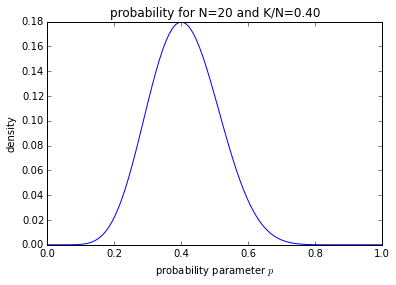

In [9]:

K=8
x = np.linspace(0., 1., 100)
mdf = [pdf(N,p,K) for p in x]
plt.plot(x,mdf, '-')
plt.title('probability for N=%i and K/N=%0.2f' % (N,K/N))
plt.xlabel('probability parameter $p$')
plt.ylabel('density')
plt.show()

total mass = 4.7143


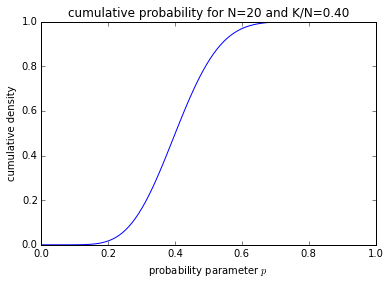

In [10]:
ms = sum(mdf)
print ("total mass = %.4f" % ms)
cdf = ft.reduce(integr, mdf)
plt.title('cumulative probability for N=%i and K/N=%0.2f' % (N,K/N))
plt.xlabel('probability parameter $p$')
plt.ylabel('cumulative density')
plot(x,cdf/ms)
plt.show()

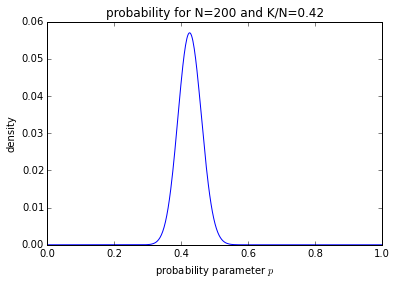

In [11]:
K2=85
x = np.linspace(0., 1., 500)
mdf2 = [pdf(N*10,p,K2) for p in x]
plt.plot(x,mdf2, '-')
plt.title('probability for N=%i and K/N=%0.2f' % (10*N,K2/(N*10)))
plt.xlabel('probability parameter $p$')
plt.ylabel('density')
plt.show()

total mass = 2.4826


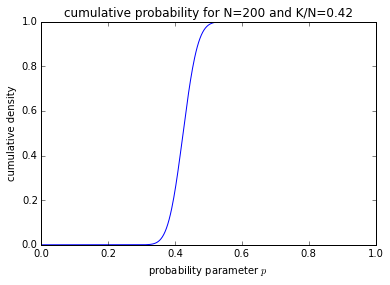

In [12]:
ms2 = sum(mdf2)
print ("total mass = %.4f" % ms2)
cdf2 = ft.reduce(integr, mdf2)
plt.title('cumulative probability for N=%i and K/N=%0.2f' % (10*N,K2/(10*N)))
plt.xlabel('probability parameter $p$')
plt.ylabel('cumulative density')
plot(x,cdf2/ms2)
plt.show()

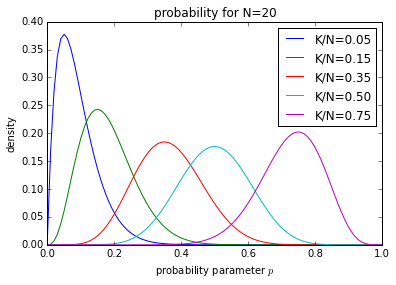

In [13]:
x = np.linspace(0., 1., 100)
for K in (1,3,7,10,15):
    mdf = [pdf(N,p,K) for p in x]
    plt.plot(x,mdf, '-', label="K/N=%.2f"%(K/N))
plt.title('probability for N=%i' % (N))
plt.xlabel('probability parameter $p$')
plt.ylabel('density')
plt.legend()
plt.show()